In [15]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu121'

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [17]:
# Creating known parameters
weight = 0.7
bias = 0.3

# Create data
X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

#X[:11], y[:11] #Printing the first 10 data points

In [18]:
# Now we need to split our data into training and dev sets

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test) 

(40, 40, 10, 10)

In [19]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", s=6, label = "Training Data")

  # Plot test data in magenta
  plt.scatter(test_data, test_labels, c="m", s=6, label = "Test Data")

  if predictions is not None:
    # Plot the predictions in red (predictions are made on the test data)
    plt.scatter(test_data, predictions, c="r", s=6, label = "Predictions")
  plt.legend(prop={"size": 14});  

In [20]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                 requires_grad=True,
                                                   dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                                 requires_grad=True,
                                                   dtype=torch.float)) # by default gradient is recorded and data type is float32 therefore no need to explicitly specify it
    def forward(self, x : torch.Tensor):
          return self.weights * x + self.bias
torch.manual_seed(42)

model_0 = LinearRegressionModel()

In [21]:
# Making prediction using torch.inference.model()
# To check our model's predictive power

with torch.inference_mode():
    y_preds = model_0(X_test) # Inference mode does not save gradients, hence use of context manager.

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

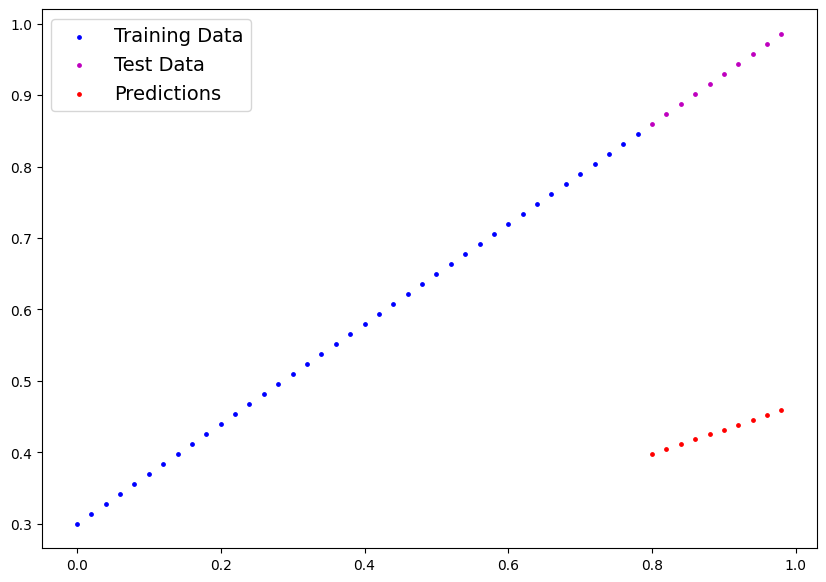

In [22]:
plot_predictions(predictions = y_preds)

In [23]:
# Training the model
# Loss function and optimiser required, for linear regression most likely mean squared error and 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [24]:
loss_fn = nn.L1Loss()

optimiser = torch.optim.SGD(params=model_0.parameters(), lr = 0.01) # Stochastic Gradient Descent


In [25]:
# Training loop and testing loop
num_epochs = 200
epoch_count = []
loss_values = []
test_loss_values = []
for epoch in range(num_epochs):
    model_0.train() # train() makes requires_grad = True
    # Forward propogation
    y_preds = model_0(X_train)
    # Calculating loss 
    loss = loss_fn(y_preds, y_train)

    optimiser.zero_grad() 
    loss.backward() # Backpropagation
    optimiser.step() 
    
    model_0.eval() # Turns off different settings in the model not needed for evaluation. 
    with torch.inference_mode(): # Turns off gradient tracking
        test_preds = model_0(X_test)
        test_loss = loss_fn(test_preds, y_test)
    if (epoch+1) % 10 == 0:
        epoch_count.append(epoch+1)
        loss_values.append(loss.item())
        test_loss_values.append(test_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}] | Loss: {loss.item():.4f} | Test loss: {test_loss:.4f}')
        print(model_0.state_dict())



Epoch [10/200] | Loss: 0.2092 | Test loss: 0.3598
OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])
Epoch [20/200] | Loss: 0.0968 | Test loss: 0.2282
OrderedDict([('weights', tensor([0.4146])), ('bias', tensor([0.3258]))])
Epoch [30/200] | Loss: 0.0546 | Test loss: 0.1497
OrderedDict([('weights', tensor([0.4483])), ('bias', tensor([0.3743]))])
Epoch [40/200] | Loss: 0.0459 | Test loss: 0.1154
OrderedDict([('weights', tensor([0.4728])), ('bias', tensor([0.3868]))])
Epoch [50/200] | Loss: 0.0420 | Test loss: 0.1003
OrderedDict([('weights', tensor([0.4920])), ('bias', tensor([0.3848]))])
Epoch [60/200] | Loss: 0.0385 | Test loss: 0.0893
OrderedDict([('weights', tensor([0.5100])), ('bias', tensor([0.3798]))])
Epoch [70/200] | Loss: 0.0351 | Test loss: 0.0810
OrderedDict([('weights', tensor([0.5272])), ('bias', tensor([0.3728]))])
Epoch [80/200] | Loss: 0.0317 | Test loss: 0.0734
OrderedDict([('weights', tensor([0.5441])), ('bias', tensor([0.3653]))])
Epoch [90/200] |

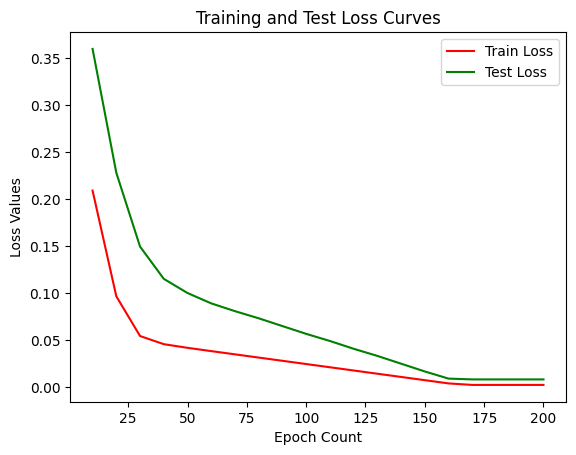

In [26]:
plt.plot(epoch_count, loss_values, label = "Train Loss", c="r")
plt.plot(epoch_count, test_loss_values, label = "Test Loss", c = "g")
plt.title("Training and Test Loss Curves")
plt.xlabel("Epoch Count")
plt.ylabel("Loss Values")
plt.legend()

In [27]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)  

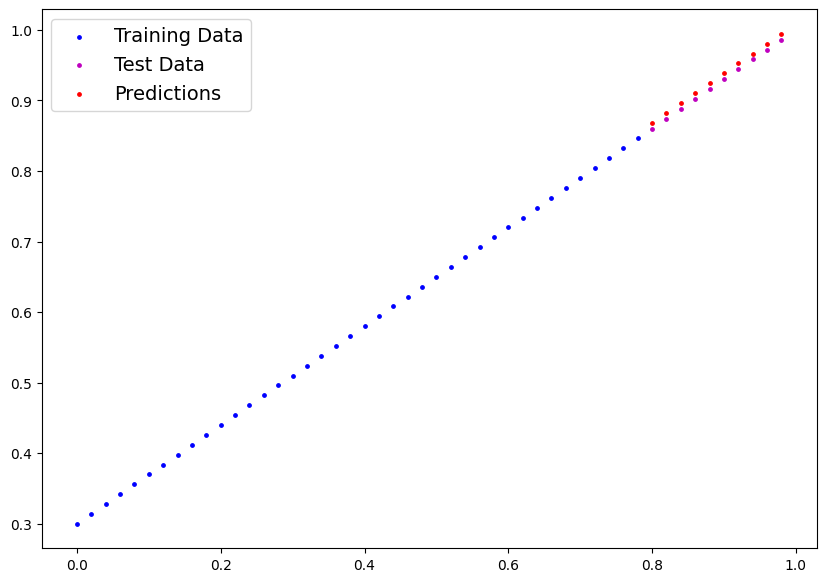

In [28]:
plot_predictions(predictions = y_preds_new)